In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [203]:

%matplotlib inline


# Data

### Import data

In [204]:
df = pd.read_csv('/users/emmali/Downloads/cookie_cats.csv')
df.head(13)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


### Check missing values

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


### Count the number of players in each group

In [206]:
df_count = df[['version','userid']].groupby('version').count()
df_count.columns = ['Number of Players']
df_count

,Number of Players
version,
gate_30,44700
gate_40,45489


# Analyzing Player Behavior

Text(0, 0.5, 'Gamerounds')

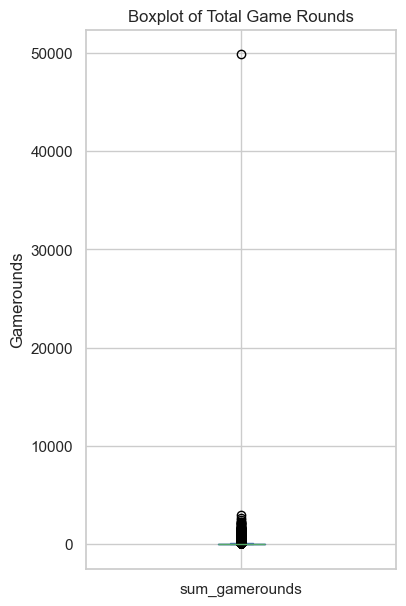

In [207]:
df['sum_gamerounds'].plot.box(figsize=(4,7))
plt.title('Boxplot of Total Game Rounds')
plt.ylabel('Gamerounds')

In [208]:
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

### Remove the outlier

In [209]:
df['sum_gamerounds'].sort_values(ascending=False).head()

57702    49854
7912      2961
29417     2640
43671     2438
48188     2294
Name: sum_gamerounds, dtype: int64

In [210]:
df.drop(57702, inplace=True)

In [211]:
plot_df = df.groupby('sum_gamerounds')['userid'].count().reset_index()
plot_df.columns = ['sum_gamerounds','count']
plot_df.head()

,sum_gamerounds,count
0,0,3994
1,1,5538
2,2,4606
3,3,3958
4,4,3629


/var/folders/4c/8l6l08nj1gz4mkln9mdw_t_80000gn/T/ipykernel_82516/1543819771.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sum_gamerounds'], bins=40, hist=True, kde=True, rug=True, color='g')


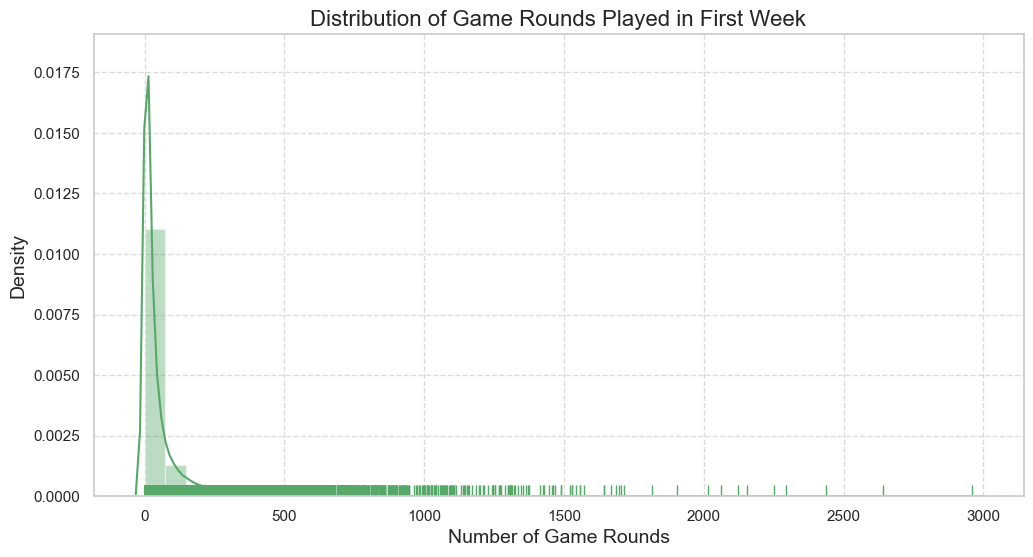

In [212]:
plt.figure(figsize=(12, 6))
sns.distplot(df['sum_gamerounds'], bins=40, hist=True, kde=True, rug=True, color='g')
plt.title('Distribution of Game Rounds Played in First Week', fontsize=16)
plt.xlabel('Number of Game Rounds', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x800 with 0 Axes>

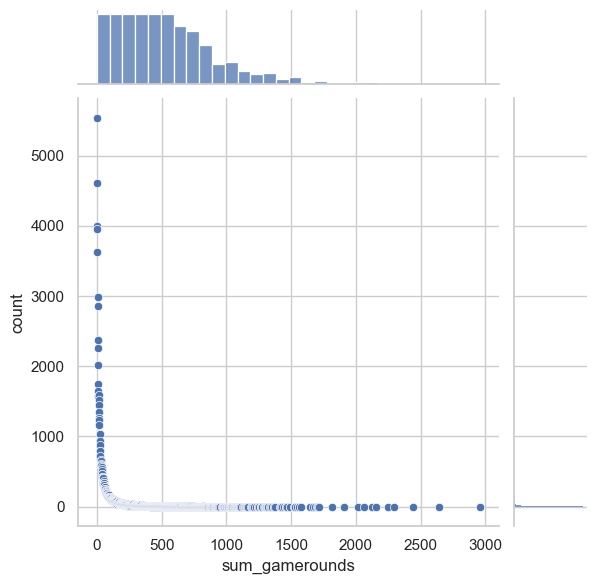

<Figure size 1000x800 with 0 Axes>

In [213]:
sns.jointplot(x='sum_gamerounds', y='count',
              data=plot_df,
              color=None,
)
plt.figure(figsize=(10,8))

A lot of players quit the game at the begining

Text(0.5, 1.0, 'The number of players that played 0-100 game rounds during the first week')

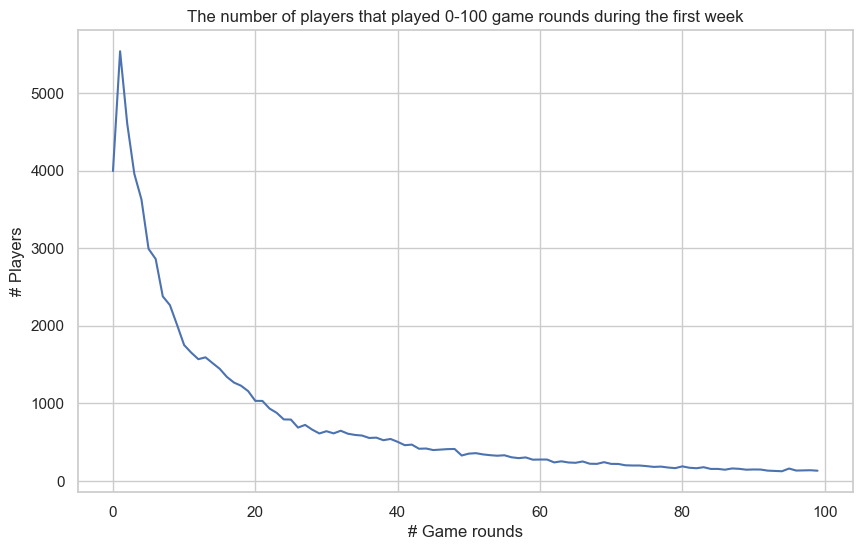

In [214]:
# Plot the distribution of players that played 0 to 100 game rounds during the frist week

ax = plot_df[:100]['count'].plot(figsize=(10,6))
ax.set_xlabel('# Game rounds')
ax.set_ylabel('# Players')
ax.set_title('The number of players that played 0-100 game rounds during the first week')

A huge number of players played fewer than 20 rounds and quit.

For rounds greater than 60, the number of players stayed steady at about 300.

# Comparing 1-day Retention

### Overall 1-day retention

In [215]:
df['retention_1'].sum() / df['retention_1'].count()

0.4452144409455803

In [216]:
df['retention_1'].mean()

0.4452144409455803

## 1-day retention for each group

In [217]:
retention_1d = df.groupby('version')['retention_1'].agg(['mean', 'count','sum']).reset_index()
retention_1d


,version,mean,count,sum
0,gate_30,0.448198,44699,20034
1,gate_40,0.442283,45489,20119


In [218]:
retention_30 = retention_1d.iloc[0,1]
retention_40 = retention_1d.iloc[1,1]

n_30 = retention_1d.iloc[0,2]
n_40 = retention_1d.iloc[1,2]

retention_30, retention_40, n_30, n_40

(0.4481979462627799, 0.44228274967574577, 44699, 45489)

### Method 1: Calculate

Assume that the gate_30 has lower retention rate than the gate_40 at 5% Type 1 error.

So the hypothesis would be:

**null:** **$p_{30}$** - **$p_{40}$** <=0

**alternative:** **$p_{30}$** - **$p_{40}$** >0

In [219]:
def z_test(p0, p1, n0, n1):
    delta = p1 - p0
    p = (p0 * n0 + p1 * n1) / (n0 + n1)
    return delta / np.sqrt(p * (1 - p) * (1 / n0 + 1 / n1))

In [220]:
p1 = retention_30
p0 = retention_40
n1 = n_30
n0 = n_40

In [221]:
z_score = z_test(p0, p1, n0, n1)
z_score

1.787103509763628

In [222]:
from scipy.stats import norm

p_value = 1 - norm.cdf(abs(z_score))
p_value

0.036960380170917295

The p-value is less than 0.05, so we can reject the null hypothesis. so we have sufficient evidence to conclude that gate_30 has a higher retention rate than gate_40.

### Method 2: Statsmodels

In [225]:
sp_30 = retention_1d.iloc[0,3]
sp_40 = retention_1d.iloc[1,3]

sp_30, sp_40

(20034, 20119)

In [228]:
import statsmodels.api as sm

z_score, p_value = sm.stats.proportions_ztest([sp_30, sp_40], [n1, n0], alternative='larger')
z_score, p_value

(1.787103509763628, 0.0369603801709173)

The p-value is less than 0.05, so we can reject the null hypothesis. so we have sufficient evidence to conclude that gate_30 has a higher retention rate than gate_40.

### Method 3: Bootstrapping

In [171]:
df.sample(frac=1, replace=True)

,userid,version,sum_gamerounds,retention_1,retention_7
85594,9483358,gate_30,72,True,True
87377,9680755,gate_40,3,False,False
74766,8283181,gate_30,21,True,False
88873,9854293,gate_40,13,True,False
62699,6946526,gate_40,4,False,False
...,...,...,...,...,...
80487,8911571,gate_40,3,False,False
78087,8646698,gate_40,40,False,False
14528,1612337,gate_40,10,True,False
27858,3103890,gate_40,0,False,False


In [172]:
df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()

version
gate_30    0.446550
gate_40    0.441907
Name: retention_1, dtype: float64

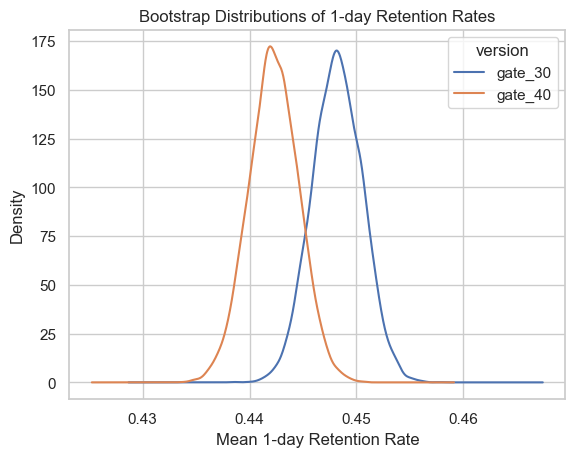

In [200]:
# Creating a list with bootstrapped means for each group
boot_1d = []
for i in range(10000):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)

# Transform list into a dataframe
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
ax = boot_1d.plot(kind='density')

# Adding labels and title
ax.set_title('Bootstrap Distributions of 1-day Retention Rates')
ax.set_xlabel('Mean 1-day Retention Rate')
ax.set_ylabel('Density')

plt.show()


In [174]:
boot_1d.head()

version,gate_30,gate_40
retention_1,0.449418,0.444830
retention_1,0.450130,0.442938
retention_1,0.450881,0.439504
retention_1,0.445124,0.440714
retention_1,0.445539,0.442451


Probability that 1-day retention is greater when the gate is level 30: 0.9629


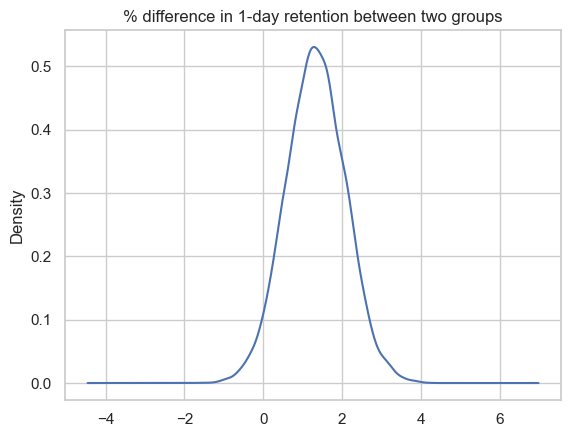

In [175]:
# Adding a column with the % difference between the two groups
boot_1d['diff'] = (boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40'] * 100

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot(kind='density')
ax.set_title('% difference in 1-day retention between two groups')

# Calculating the probability that 1-day retention is greater when the gate is at level 30
print('Probability that 1-day retention is greater when the gate is level 30:',(boot_1d['diff']>0).mean())

From this chart, we can see that the most likely % difference is around 1%-2%, and that 96% of the distribution is above 0%, in favor of a gate at level 30.

## 7-day Retention

In [176]:
retention_7d = df.groupby('version')['retention_7'].agg(['mean','sum','count']).reset_index()
retention_7d

,version,mean,sum,count
0,gate_30,0.190183,8501,44699
1,gate_40,0.182000,8279,45489


### Method 1: Calculate

In [177]:
retention_30 = retention_7d.iloc[0,1]
retention_40 = retention_7d.iloc[1,1]

n_30 = retention_7d.iloc[0,3]
n_40 = retention_7d.iloc[1,3]

sp_30 = retention_7d.iloc[0,2]
sp_40 = retention_7d.iloc[1,2]

retention_30, retention_40, n_30, n_40, sp_30, sp_40

(0.19018322557551623, 0.18200004396667327, 44699, 45489, 8501, 8279)

Assume that the gate_30 does not have higher retention rate than the gate_40 at 5% Type 1 error.

So the hypothesis would be:

**null:** **$p_{30}$** - **$p_{40}$** <=0

**alternative:** **$p_{30}$** - **$p_{40}$** >0

In [178]:
p0 = retention_30
p1 = retention_40
n0 = n_30
n1 = n_40

z_score = z_test(p0, p1, n0, n1)
z_score

-3.1574100858819936

In [179]:
from scipy import stats
p_value = stats.norm.sf(abs(z_score))
p_value

0.000795886588699672

p-value is less than 0.05, so we can reject the null hypothesis. We have strong statistical evidence to conclude that gate_30 has a higher 7-day retention rate than gate_40.

### Method 2: Statsmodels

In [180]:
z_score, p_value = sm.stats.proportions_ztest([sp_30, sp_40], [n0, n1], alternative='larger')
z_score, p_value

(3.1574100858819936, 0.000795886588699672)

p-value is less than 0.05, so we can reject the null hypothesis. We have strong statistical evidence to conclude that gate_30 has a higher 7-day retention rate than gate_40.

### Method 3: Bootstrapping

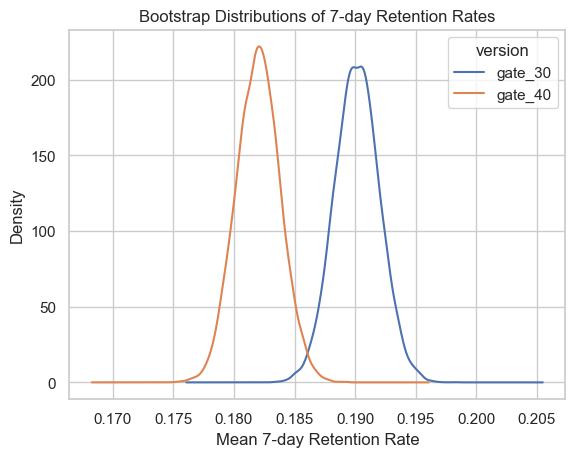

In [201]:
boot_7d = []
for i in range(10000):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)

# Transform list into a dataframe
boot_7d = pd.DataFrame(boot_7d)

# A Kernel Density Estimate plot of the bootstrap distributions
ax = boot_7d.plot(kind='density')

ax.set_title('Bootstrap Distributions of 7-day Retention Rates')
ax.set_xlabel('Mean 7-day Retention Rate')
ax.set_ylabel('Density')

plt.show()

Probability that 7-day retention is greater when the gate is level 30: 0.9993


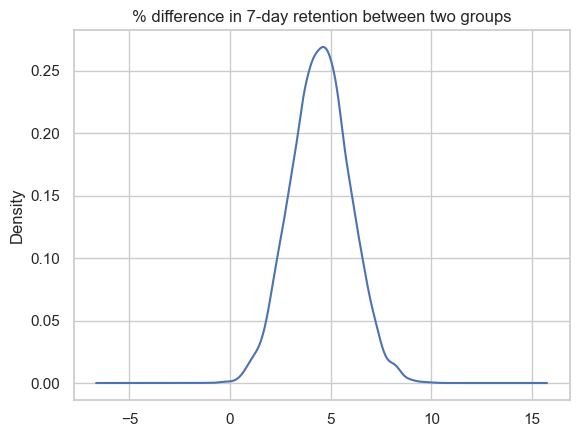

In [182]:
# Adding a column with the % difference between the two groups
boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100

# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot(kind='density')
ax.set_title('% difference in 7-day retention between two groups')

# Calculating the probability that 7-day retention is greater when the gate is at level 30
print('Probability that 7-day retention is greater when the gate is level 30:',(boot_7d['diff']>0).mean())

## Conclusion

There is strong evidence that 7-day retention is higher when gate is at level 30 than when it is at level 40.

# EDA

1. 在不同gate下，1-day转化后7-day还转化的对比
2. 不同关数（分组）下留存率对比（应考虑7-day？）
3. 1-day转化和7-day转化的关系～

1 Correlation between 1-day and 7-day:

1day转化和7day转化的关系？

2 多少关范围内更容易转化：

将关数分组

3 1day转化后7day还转化的玩家的分析（说明是high retention player: better build loyalty）

### 1. The relationship and correlation between 1-day retention and 7-day retention

In [183]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [184]:
gate_30_data = df[df['version'] == 'gate_30']
gate_30_corr = pd.crosstab(gate_30_data['retention_1'], gate_30_data['retention_7'], normalize='index')
gate_30_corr

retention_7,False,True
retention_1,,
False,0.926009,0.073991
True,0.666766,0.333234


In [185]:
gate_40_data = df[df['version']=='gate_40']
gate_40_corr = pd.crosstab(gate_40_data['retention_1'], gate_40_data['retention_7'], normalize='index')
gate_40_corr

retention_7,False,True
retention_1,,
False,0.930114,0.069886
True,0.676624,0.323376


In [186]:
ttl_corr = pd.crosstab(df['retention_1'], df['retention_7'], normalize='index')
ttl_corr

retention_7,False,True
retention_1,,
False,0.928090,0.071910
True,0.671706,0.328294


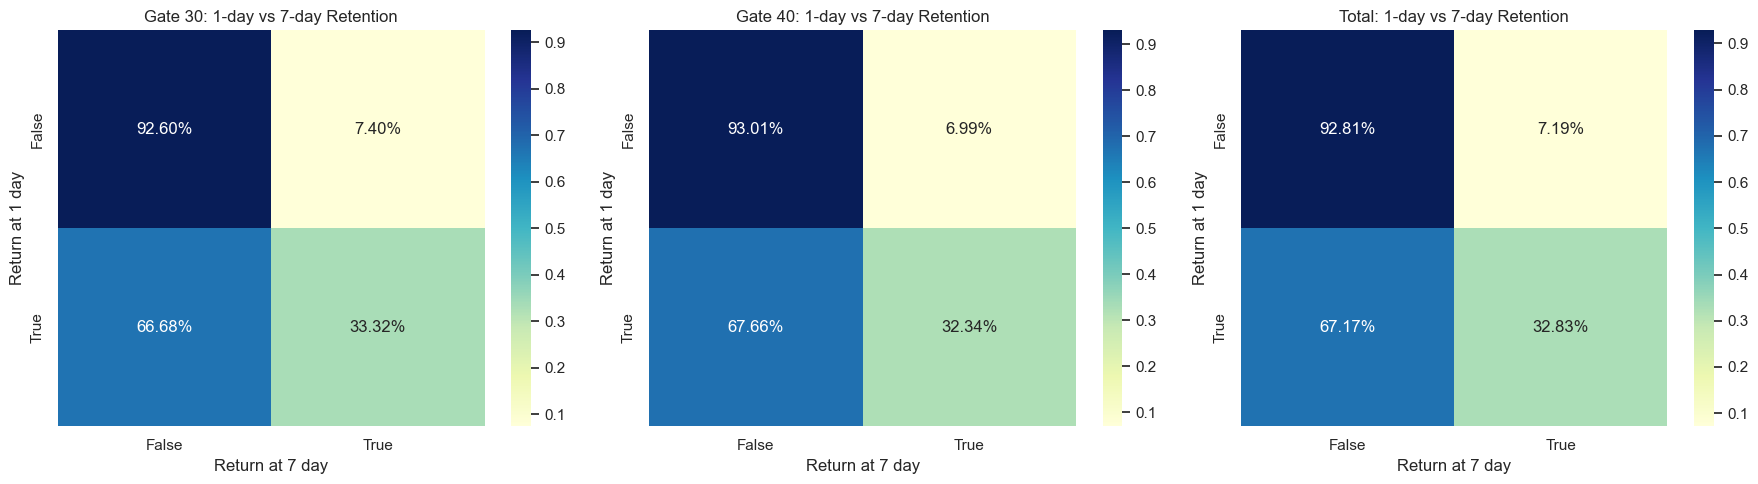

In [187]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,5))

sns.heatmap(gate_30_corr, annot=True, fmt='.2%', cmap='YlGnBu', ax=ax1)
ax1.set_title('Gate 30: 1-day vs 7-day Retention')
ax1.set_xlabel('Return at 7 day')
ax1.set_ylabel('Return at 1 day')

sns.heatmap(gate_40_corr, annot=True, fmt='.2%', cmap='YlGnBu', ax=ax2)
ax2.set_title('Gate 40: 1-day vs 7-day Retention')
ax2.set_xlabel('Return at 7 day')
ax2.set_ylabel('Return at 1 day')

sns.heatmap(ttl_corr, annot=True, fmt='.2%', cmap='YlGnBu', ax=ax3)
ax3.set_title('Total: 1-day vs 7-day Retention')
ax3.set_xlabel('Return at 7 day')
ax3.set_ylabel('Return at 1 day')

plt.tight_layout()
plt.show()

From the data, we can conclude that players are about 1% point more likely to return to play games at the 7-day mark after they were back at 1 day when their gate was at 30 levels compared to 40 levels.

More importantly, players who return after 1 day are approximately 4-5 times more likely to return after 7 days compared to those who don't return after 1 day, regardless of the gate level.

Therefore, incentivizing more players to return after 1 day is highly effective for improving longer-term retention. This strategy could significantly boost 7-day retention rates. While the gate at level 30 shows a slight advantage, the most crucial factor appears to be getting players to return after the first day, regardless of the gate level.

Recommendations:

1. Focus on strategies to encourage players to return after the first day, as this has a strong positive impact on 7-day retention.
Investigate why gate_30 has a slight edge in retention and consider applying these insights to gate_40.
2. Develop targeted re-engagement campaigns for players who don't return after 1 day, as they are at high risk of not returning at all.
3. Continue to monitor and optimize the early gameplay experience, particularly in the first 7 days, to minimize the drop-off rate even among players who initially return.

By prioritizing 1-day retention strategies, we can expect to see a significant positive impact on 7-day retention rates, ultimately leading to improved long-term player engagement and game success.

### 2. The relation between game rounds and retention

We only focusing on 7-day retention

In [188]:
df['sum_gamerounds'].describe()

count    90188.000000
mean        51.320253
std        102.682719
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max       2961.000000
Name: sum_gamerounds, dtype: float64

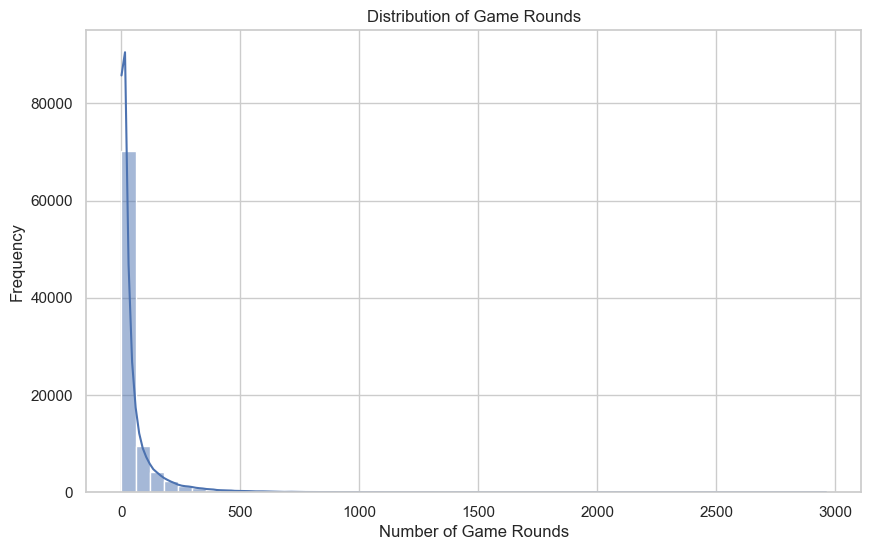

In [231]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sum_gamerounds'], bins=50, kde=True)
plt.title('Distribution of Game Rounds')
plt.xlabel('Number of Game Rounds')
plt.ylabel('Frequency')
plt.show()

In [189]:
df['gameround_group'] = pd.cut(
    df['sum_gamerounds'],
    bins=[0,5,16,51,100,200,500,np.inf],
    labels=['0-5', '6-16', '17-51', '52-100', '101-200', '201-500','500+']
)

/var/folders/4c/8l6l08nj1gz4mkln9mdw_t_80000gn/T/ipykernel_82516/1737364613.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_retention = df.groupby('gameround_group')['retention_7'].mean()


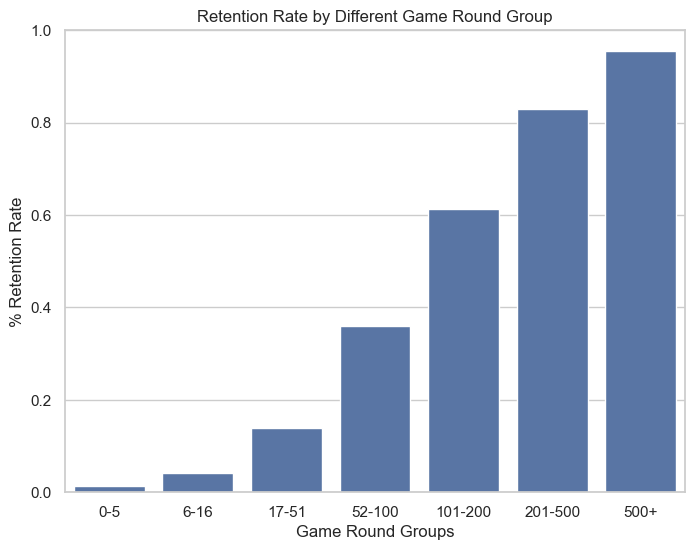

In [190]:
group_retention = df.groupby('gameround_group')['retention_7'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=group_retention.index, y=group_retention.values)
plt.xlabel('Game Round Groups')
plt.ylabel('% Retention Rate')
plt.title('Retention Rate by Different Game Round Group')
plt.ylim(0, 1) 
plt.show()


Notably, higher retention rates are observed in the groups with more than 100 and even more than 200 game rounds. This suggests that players who engage more intensively during the first week are more likely to return.

We may conclude that players who enjoy or become addicted to the game in the first week are more likely to continue playing. Therefore, it is crucial to foster loyalty among these engaged players to retain them in the long term.

### 3. high loyalty user analysis

who both return after 1 day and 7 day

In [191]:
high_loyalty = df[(df['retention_1'] == True) & (df['retention_7'] == True)]
high_loyalty.head()

,userid,version,sum_gamerounds,retention_1,retention_7,gameround_group
4,488,gate_40,179,True,True,101-200
5,540,gate_40,187,True,True,101-200
8,1574,gate_40,108,True,True,101-200
14,2218,gate_30,305,True,True,201-500
17,2451,gate_30,204,True,True,201-500


In [192]:
high_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13182 entries, 4 to 90163
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   userid           13182 non-null  int64   
 1   version          13182 non-null  object  
 2   sum_gamerounds   13182 non-null  int64   
 3   retention_1      13182 non-null  bool    
 4   retention_7      13182 non-null  bool    
 5   gameround_group  13177 non-null  category
dtypes: bool(2), category(1), int64(2), object(1)
memory usage: 450.9+ KB


In [193]:
high_loyalty_group = high_loyalty.groupby('version').count().iloc[:, 0:1].reset_index().rename(columns={'userid': 'count'})
high_loyalty_group

,version,count
0,gate_30,6676
1,gate_40,6506


In [194]:
ttl_count = df.groupby('version').count().iloc[:,0:1].reset_index().rename(columns={'userid': 'count'})
ttl_count

,version,count
0,gate_30,44699
1,gate_40,45489


In [195]:
high_loyalty_group = pd.merge(high_loyalty_group, ttl_count, on='version').rename(columns={'count_x': 'high_loyalty', 'count_y': 'total'})
high_loyalty_group

,version,high_loyalty,total
0,gate_30,6676,44699
1,gate_40,6506,45489


In [196]:
high_loyalty_group['propotion'] = high_loyalty_group['high_loyalty'] / high_loyalty_group['total']
high_loyalty_group

,version,high_loyalty,total,propotion
0,gate_30,6676,44699,0.149355
1,gate_40,6506,45489,0.143024


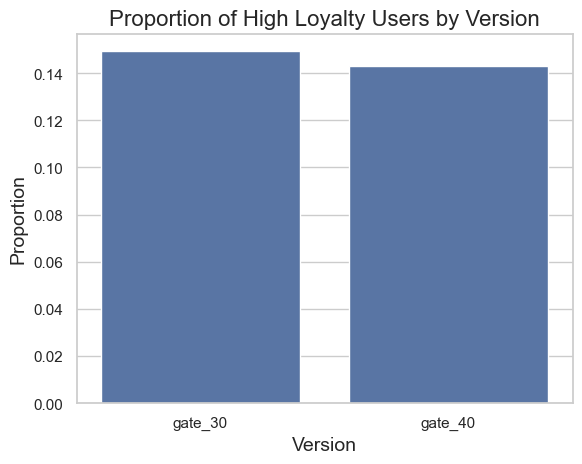

In [197]:
sns.barplot(x='version', y='propotion', data=high_loyalty_group)

plt.title('Proportion of High Loyalty Users by Version', fontsize=16)
plt.xlabel('Version', fontsize=14)
plt.ylabel('Proportion', fontsize=14)

plt.show()

Text(0.5, 0, 'Number of High Loyalty Players')

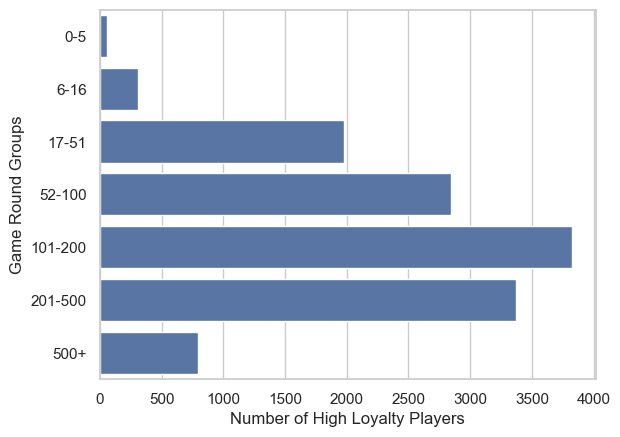

In [233]:
sns.countplot(data = high_loyalty['gameround_group'])
plt.ylabel('Game Round Groups')
plt.xlabel('Number of High Loyalty Players')

/var/folders/4c/8l6l08nj1gz4mkln9mdw_t_80000gn/T/ipykernel_82516/3616919655.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retention_rate_by_groups = df.groupby('gameround_group')['retention_7'].mean().reset_index()


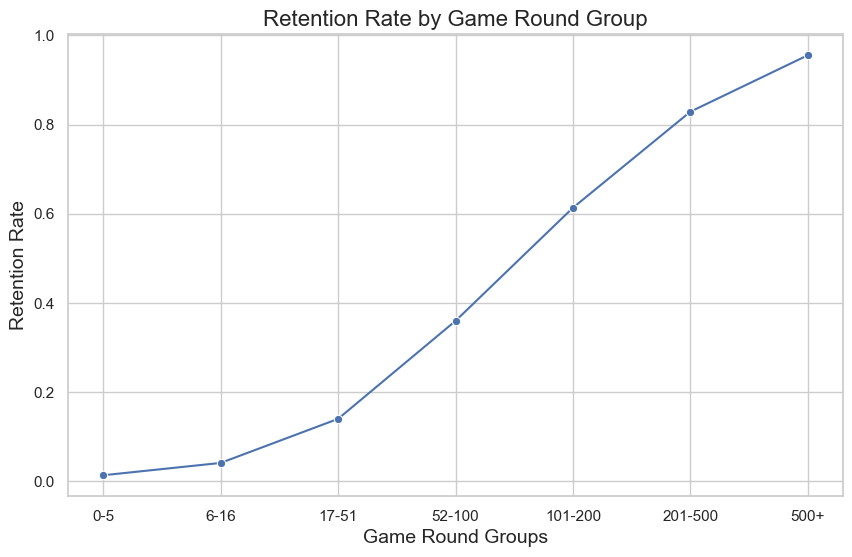

In [199]:
retention_rate_by_groups = df.groupby('gameround_group')['retention_7'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x='gameround_group', y='retention_7', data=retention_rate_by_groups, marker='o')


plt.title('Retention Rate by Game Round Group', fontsize=16)
plt.xlabel('Game Round Groups', fontsize=14)
plt.ylabel('Retention Rate', fontsize=14)

plt.show()